In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl  
import matplotlib.pyplot as plt
# 读取数据集
df = pd.read_csv(r"./data1-ForPCA.csv",
     sep=',',
     header=None).reset_index(drop=True)
df.columns = ['a','b']
df.dropna(how="all", inplace=True)
df.tail() #返回最后5个

,a,b
995,1.349675,-1.492820
996,-0.934850,-1.966114
997,-2.544583,-4.381028
998,-0.322864,-0.506302
999,3.279953,8.624957


#### 1.浅画个图-变换前

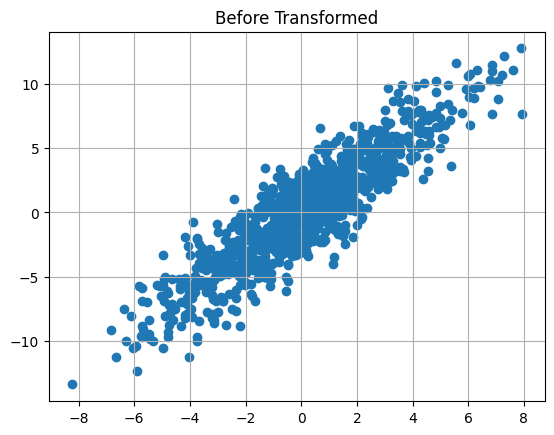

In [22]:
x = df['a']
y = df['b']
# 创建坐标轴  
# plt.title('变换前')  
plt.title('Before Transformed')
plt.scatter(x,y)
plt.grid()
plt.show()

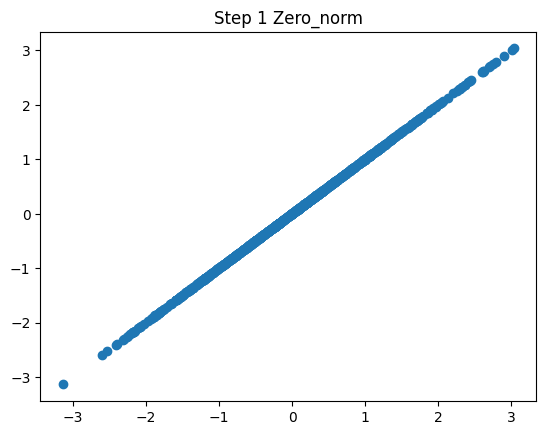

In [4]:
### 第一步：数据最大最小规范化 零均质化
from math import atan
x_new = (x - x.min())/(x.max() - x.min())
y_new = (y - y.min())/(y.max() - y.min())

x_new =(x_new - x_new.mean())/x_new.std()
y_new =(y_new - y_new.mean())/y_new.std()
plt.title('Step 1 Zero_norm')
plt.scatter(x_new,x_new)
plt.show()

#任取两点 求k=tan(theta) 求theta的值
k = (x_new[1]-x_new[2])/(y_new[1]-y_new[2])
theta = atan(k)
orignal_point = (x_new[500],y_new[500])


In [5]:
### 求协方差矩
len(x_new)
orignal_point

(-0.003041401691699381, 0.2787936549778699)

#### 求协方差矩阵R 
$R= \begin{equation}
 \left[
 \begin{array}{ccc}
     Cov(x,x) & Cov(x,y)  \\
     Cov(x,y) & Cov(y,y) \\ 
 \end{array}
 \right]        
 \end{equation}
$

In [6]:
# x = x.to_list()
# y = y.to_list()
# a = np.append(np.cov(x,x)[0][0],np.cov(x,y)[1][1],axis=1)
# b = np.append(np.cov(x,y)[1][1],np.cov(y,y)[0][0],axis=1)
# a = [np.cov(x,x)[0][0],np.cov(x,y)[1][1]]
# b = [np.cov(x,y)[1][1],np.cov(y,y)[0][0]]
R = np.cov(x,y)
eigenvalue, featurevector = np.linalg.eig(R)
print(f'协方差矩阵R的特征向量是:\n{featurevector},特征值是:{eigenvalue}')
#featurevector2 =np.append([featurevector[1],featurevector[0]],axis=1)
featurevector2 = np.array([[0.49968392,-0.86620782],[ -0.86620782,-0.49968392]])


协方差矩阵R的特征向量是:
[[-0.86620782 -0.49968392]
 [ 0.49968392 -0.86620782]],特征值是:[ 0.97042734 24.69767845]


In [7]:
featurevector2

array([[ 0.49968392, -0.86620782],
       [-0.86620782, -0.49968392]])

In [13]:
featurevector

array([[-0.86620782, -0.49968392],
       [ 0.49968392, -0.86620782]])

#### 变换后的坐标轴

In [16]:
data = []
for i in range(1000):
    data.append([x[i],y[i]])
# data 10000个 【xi,yi】
data_after = []
for i in data:
    data_after.append(np.matmul(i,featurevector))
    #data_after.append(np.matmul(i,featurevector.T))
x_after=[]
y_after=[]
for i in data_after:
    x_after.append(i[0])
    y_after.append(i[1])


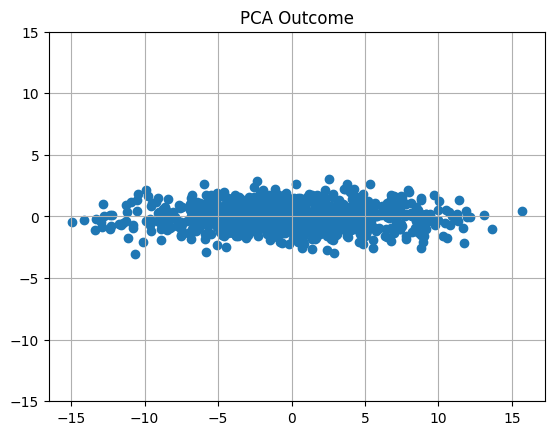

In [21]:
plt.scatter(y_after,x_after)
plt.ylim(-15,15)
plt.title('PCA Outcome')
plt.grid()
plt.show()

(array([  2.,  10.,  14.,  18.,  31.,  43.,  80.,  79., 115., 135., 119.,
        107.,  87.,  61.,  43.,  31.,  12.,  10.,   2.,   1.]),
 array([-14.97527705, -13.44080142, -11.90632578, -10.37185015,
         -8.83737451,  -7.30289887,  -5.76842324,  -4.2339476 ,
         -2.69947197,  -1.16499633,   0.36947931,   1.90395494,
          3.43843058,   4.97290621,   6.50738185,   8.04185749,
          9.57633312,  11.11080876,  12.64528439,  14.17976003,
         15.71423567]),
 <BarContainer object of 20 artists>)

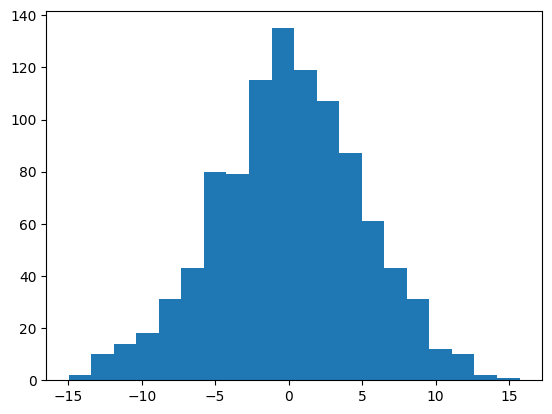

In [30]:
plt.hist(y_after,bins=20)